# Table of Contents

- [Gathering](#Gathering)
- [Assessing](#Assessing)
- [Observations](#Observations)
- [Cleaning](#Cleaning)
- [Visualizations](#Visualizations)
- [Sources](#sources)

## Project Details

- Data wrangling, which consists of:
    - Gathering data 
        1. From 'twitter-archive-enhanced.csv' file.
        2. From a link 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'.
        3. From twitter API.
    - Assessing data
    - Cleaning data
- Storing, analyzing, and visualizing your wrangled data
- Reporting on 
    1. data wrangling efforts. 
    2. your data analyses and visualizations

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import os
from twitter_api import get_twitter_data
import json
from sqlalchemy import create_engine
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Do not truncate data in cells
pd.set_option('display.max_colwidth', None)

# Do not limit number of displayed columns
pd.set_option('display.max_columns', None)

# Display floats with 2 decimals
pd.set_option('display.float_format', '{:20,.2f}'.format)


# Gathering

In [2]:
#load twitter archive file into pandas df.
df_arch = pd.read_csv('data/twitter-archive-enhanced.csv')

In [3]:
#download image predictions file.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join('data/' + url.split('/')[-1]), 'wb') as file:
    file.write(response.content)

In [4]:
# load image predictions file into pandas df.
df_pred = pd.read_csv('data/image-predictions.tsv', sep='\t')

In [5]:
#download data from twitter API 
get_twitter_data(df_arch, 'data/tweet_json.txt')

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [6]:
#load tweets data into pandas df
with open('data/tweet_json.txt') as file:
    df_api = pd.read_json(file, lines= True, encoding = 'utf-8')

***

# Assessing

In [7]:
df_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,nan,nan,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,nan,nan,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,nan,nan,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,nan,nan,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [8]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df_arch[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,"2,356.00","2,356.00"
mean,13.13,10.46
std,45.88,6.75
min,0.00,0.00
25%,10.00,10.00
50%,11.00,10.00
75%,12.00,10.00
max,"1,776.00",170.00


In [10]:
df_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,malinois,0.14,True,bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,redbone,0.36,True,miniature_pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.17,False,Labrador_retriever,0.17,True,spatula,0.04,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.72,True,malamute,0.08,True,kelpie,0.03,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.32,True,Pekinese,0.09,True,papillon,0.07,True


In [11]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_pred.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [13]:
df_api

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",nan,nan,nan,nan,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/Wrvtpnv7JV', 'entities': {'url': {'urls': [{'url': 'https://t.co/Wrvtpnv7JV', 'expanded_url': 'https://blacklivesmatters.carrd.co', 'display_url': 'blacklivesmatters.carrd.co', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 8835390, 'friends_count': 17, 'listed_count': 5751, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 145836, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 12636, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1267972589722296320/XBr04M6J_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1267972589722296320/XBr04M6J_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1591077312', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': False, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",nan,nan,None,nan,False,7579,35813,False,False,0.00,0.00,en,NaN,nan,nan,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,8921774213063

In [14]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

***

## Observations
The following observations were made visually using Excel to view the data and Programmaticly using pandas functions.

### Quality

<font color=#0877cc size=4>**df_arch**</font>
1. Columns (`doggo`, `floofer`, `pupper`, `puppo`) has `None` for missing values.
2. `source` column is html tag `<a>` we can extract the source of the tweet and covert it to categorical.
3. `text` column has the link for the tweets and ratings at the end we can remove it.
4. `timestamp` column is `str` instead of `datetime`
5. We are interested in the tweet ONLY not the retweet there for we should remove those from the table.
6. We are interested in the tweet ONLY not the reply to the original tweet there for we should remove those from the table.
7. `rating_numerator` column has values less than 10 and very high values some of them for checken and other animals.
8. `rating_denominator` column has values less than 10 and values more than 10 for ratings more than one dog.
9. `expanded_urls` column has NaN values
10. `id` column in df_api name different than the other 2 data sets.
11. `name` column have None instead of NaN.

## Tidiness

<font color=#0877cc size=4>**df_arch**</font>
- `doggo`, `floofer`, `pupper`, `puppo` columns are all about the same things, a kind of dog personality.

<font color=#0877cc size=4>**df_pred**</font>
- `img_num` useless.
- the columns (`p1`, `p1_dog`, `p1_conf`, ...etc) should be just `breed` and `confidence`.

<font color=#0877cc size=4>**df_api**</font>
- Just 3 columns needed `id`, `retweet_count`, `favorite_count`

<font color=#0877cc size=4>**General**</font>
- All datasets should be combined into 1 dataset only

***

# Cleaning

### First let's take a copy from our data frames to work on cleaning it.

In [15]:
df_arch_cleaned = df_arch.copy()
df_pred_cleaned = df_pred.copy()
df_api_cleaned = df_api.copy()

### Define
Replace 'None' with `np.nan` for Columns (`doggo`, `floofer`, `pupper`, `puppo`).

### Code

In [16]:
col_list = ['doggo', 'floofer', 'pupper', 'puppo']

for col in col_list:
    df_arch_cleaned[col] = df_arch_cleaned[col].replace('None', np.nan)

### Test

In [17]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       97 no

### Define
Extract tweet source from `source` column using `apply` meth in pandas and convert it to categorical.

### Code

In [18]:
# check for the unique values
df_arch_cleaned.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [19]:
#make a function fix_source which extract the strings between tags
def fix_source(x):
    'x is an html string from the source column in df_arch_cleaned dataset'
    #find the first closed  tag >
    i= x.find('>') + 1
    # find the first open tag after the previous <
    j =x[i:].find('<')
    # extract the text in between
    return x[i:][:j]

In [20]:
df_arch_cleaned.source = df_arch_cleaned.source.apply(lambda x: fix_source(x)).astype('category')

### Test

In [21]:
# check for the unique values
df_arch_cleaned.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']

### Define
Remove ratings and links from `text` column using `RegEx`.

### Code

In [22]:
df_arch_cleaned.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [23]:
df_arch_cleaned.text = df_arch_cleaned.text.str.extract('(.+(?=\s\d+/\d+\s))')

### Test

In [24]:
df_arch_cleaned.text.sample(10)

880                                                                          This is Atlas. Swinging is his passion.
2292    This is Bradlay. He is a Ronaldinho Matsuyama mix. Can also mountain bike (wow). Loves that blue light lime.
1113                                                                    Like father (doggo), like son (pupper). Both
1533                                                                   This is Covach. He's trying to melt the snow.
135                                       This is Jamesy. He gives a kiss to every other pupper he sees on his walk.
1961                                       This is Steve. He was just relaxing in hot tub when he was intruded upon.
898         This is Lilli Bee &amp; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both
618                                  RT @dog_rates: This is Ruby. She just turned on the news. Officially terrified.
836                                                        This 

### Define
Converte `timestamp` column to datetime.

### Code

In [25]:
df_arch_cleaned.timestamp = pd.to_datetime(df_arch_cleaned.timestamp)

### Test

In [26]:
df_arch_cleaned.timestamp.dtype

datetime64[ns, UTC]

### Define
Remove retweets and replies.

### Code

In [27]:
df_arch_cleaned = df_arch_cleaned.query('in_reply_to_status_id == "NaN" &\
                                                     in_reply_to_user_id == "NaN" &\
                                                    retweeted_status_id == "NaN" &\
                                                    retweeted_status_user_id == "NaN"')
# drop columns
cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp']
df_arch_cleaned.drop(columns = cols, axis=1, inplace=True)

### Test


In [28]:
# check for Null values in the df_arch_cleaned
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2029 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              230 non-null    object             
 11  puppo               24 non-null     object             
dtypes: category(1), datetime64[ns, UTC

### Define
Remove values less than 5 in `rating_numerator` and values other than 10 for `rating_denominator`

### Code

In [29]:
df_arch_cleaned = df_arch_cleaned[df_arch_cleaned['rating_numerator'] >= 5]
df_arch_cleaned = df_arch_cleaned[df_arch_cleaned['rating_denominator'] == 10]

### Test

In [30]:
df_arch_cleaned[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,"2,032.00","2,032.00"
mean,11.91,10.00
std,40.26,0.00
min,5.00,10.00
25%,10.00,10.00
50%,11.00,10.00
75%,12.00,10.00
max,"1,776.00",10.00


### Define
Remove any rows not related to dogs


### Code

In [31]:
df_arch_cleaned = df_arch_cleaned[~df_arch_cleaned.text.isnull()]

In [32]:
df_arch_cleaned = df_arch_cleaned.loc[~df_arch_cleaned.text.str.match('.*only rate dogs')]

### Test

In [33]:
df_arch_cleaned.loc[df_arch_cleaned.text.str.match('.*only rate dogs')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [34]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1919 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1919 non-null   int64              
 1   timestamp           1919 non-null   datetime64[ns, UTC]
 2   source              1919 non-null   category           
 3   text                1919 non-null   object             
 4   expanded_urls       1917 non-null   object             
 5   rating_numerator    1919 non-null   int64              
 6   rating_denominator  1919 non-null   int64              
 7   name                1919 non-null   object             
 8   doggo               82 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              224 non-null    object             
 11  puppo               23 non-null     object             
dtypes: category(1), datetime64[ns, UTC

### Define
Drop rows with NaNs for `expanded_urls` column.

### Code

In [35]:
df_arch_cleaned = df_arch_cleaned.loc[~df_arch_cleaned.expanded_urls.isnull()]

### Test

In [36]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1917 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1917 non-null   int64              
 1   timestamp           1917 non-null   datetime64[ns, UTC]
 2   source              1917 non-null   category           
 3   text                1917 non-null   object             
 4   expanded_urls       1917 non-null   object             
 5   rating_numerator    1917 non-null   int64              
 6   rating_denominator  1917 non-null   int64              
 7   name                1917 non-null   object             
 8   doggo               82 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              223 non-null    object             
 11  puppo               23 non-null     object             
dtypes: category(1), datetime64[ns, UTC

### Define
Create `dog_stage` column and remove the (`doggo`, `floofer`, `pupper`, `puppo`) columns.

### Code

In [37]:
# select the dog stages columns from the dataset
cols = ['doggo', 'floofer', 'pupper', 'puppo']

# create the dog_stage column with joining the four columns in one column dog_stage join for more than stage
df_arch_cleaned['dog_stage'] = df_arch_cleaned[cols].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
# replace the empty string with nan and change datatype to category
df_arch_cleaned.dog_stage = df_arch_cleaned.dog_stage.replace('', np.nan).astype('category')

# drop the 4 columns
df_arch_cleaned = df_arch_cleaned.drop(columns = cols, axis =1)

### Test

In [38]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1917 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1917 non-null   int64              
 1   timestamp           1917 non-null   datetime64[ns, UTC]
 2   source              1917 non-null   category           
 3   text                1917 non-null   object             
 4   expanded_urls       1917 non-null   object             
 5   rating_numerator    1917 non-null   int64              
 6   rating_denominator  1917 non-null   int64              
 7   name                1917 non-null   object             
 8   dog_stage           327 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 124.1+ KB


In [39]:
df_arch_cleaned.dog_stage.value_counts()

pupper            214
doggo              71
puppo              22
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Define
- Replace 'None' with np.name in df_arch `name` column and convert it to title.

### Code

In [40]:
df_arch_cleaned.name = df_arch_cleaned.name.replace('None', np.nan).str.title()

### Test

In [41]:
df_arch_cleaned.name.value_counts()

A            43
Lucy         11
Charlie      11
Cooper       10
Oliver       10
             ..
Nugget        1
Duddles       1
Schnitzel     1
Bones         1
Cilantro      1
Name: name, Length: 922, dtype: int64

### Define
- Remove `img_num` column from df_pred_cleand.

### Code

In [42]:
df_pred_cleaned.drop('img_num', axis=1, inplace=True)

### Test

In [43]:
df_pred_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


### Define
Create `breed` and `confidence` columns with highest confidence predictions and drop other columns

### Code

In [44]:
breed = []
confidence = []
# iterating over df_pred row by row and taking the highest confident prediction other wise np.nan
for index, row in df_pred_cleaned.iterrows():
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
df_pred_cleaned['breed'] = breed
df_pred_cleaned['confidence'] = confidence


In [45]:
df_pred_cleaned = df_pred_cleaned[['tweet_id', 'jpg_url', 'breed', 'confidence']]

### Test

In [46]:
df_pred_cleaned.sample(10)

,tweet_id,jpg_url,breed,confidence
1240,746906459439529985,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,NaN,nan
223,670303360680108032,https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg,Shetland_sheepdog,0.38
803,691483041324204033,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,bloodhound,0.89
500,675845657354215424,https://pbs.twimg.com/media/CWEWClfW4AAnqhG.jpg,pug,0.88
2054,888078434458587136,https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg,French_bulldog,1.00
1224,744971049620602880,https://pbs.twimg.com/media/ClarNU8VAAEDrDt.jpg,toy_poodle,0.50
730,686618349602762752,https://pbs.twimg.com/media/CYdbvwjWcAEtjYu.jpg,Rottweiler,0.44
1035,711743778164514816,https://pbs.twimg.com/media/CeCfMPDW0AAAEUj.jpg,Lakeland_terrier,0.46
1573,795400264262053889,https://pbs.twimg.com/media/CwnUUGTWIAE8sFR.jpg,golden_retriever,0.93
1177,737800304142471168,https://pbs.twimg.com/media/Cj0xdMBVAAEbDHp.jpg,malamute,0.37


In [47]:
df_pred_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       1532 non-null   object 
 3   confidence  1532 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


### Define
Remove unnecessary columns for df_api_cleand

### Code

In [48]:
df_api_cleaned.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [49]:
df_api_cleaned = df_api_cleaned[['id', 'retweet_count', 'favorite_count']]

### Test

In [50]:
df_api_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


### Define
Rename `id` column in df_api_cleand to `tweet_id`

### Code

In [51]:
df_api_cleaned.columns = ['tweet_id', 'retweet_count', 'favorite_count']

### Test

In [52]:
df_api_cleaned.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Define
- merge data into database

### Code

In [53]:
df = pd.merge(df_arch_cleaned, df_pred_cleaned, on='tweet_id')
df = pd.merge(df, df_api_cleaned, on = 'tweet_id')

In [54]:
# Create SQLAlchemy Engine and empty twitter_archive_master database
engine = create_engine('sqlite:///data/twitter_archive_master.db')
# Store master df into table master 
try:
    df.to_sql('master', engine, index=False)
except Exception as e:
    print(e)
    

Table 'master' already exists.


### Test

In [55]:
df_master = pd.read_sql('SELECT * FROM master', engine, parse_dates='timestamp')
df_master.source = df_master.source.astype('category')
df_master.dog_stage = df_master.dog_stage.astype('category')
df_master.breed = df_master.breed.astype('category')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1790 non-null   int64         
 1   timestamp           1790 non-null   datetime64[ns]
 2   source              1790 non-null   category      
 3   text                1790 non-null   object        
 4   expanded_urls       1790 non-null   object        
 5   rating_numerator    1790 non-null   int64         
 6   rating_denominator  1790 non-null   int64         
 7   name                1366 non-null   object        
 8   dog_stage           294 non-null    category      
 9   jpg_url             1790 non-null   object        
 10  breed               1342 non-null   category      
 11  confidence          1342 non-null   float64       
 12  retweet_count       1790 non-null   int64         
 13  favorite_count      1790 non-null   int64       

***

# Visualizations

- let's have a look for the ratings distribution by ploting a bar chart for it's frequency.

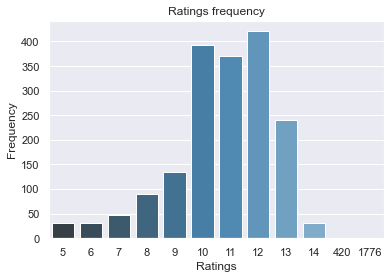

In [56]:
data = df_master.rating_numerator.value_counts()

x = data.index
y = data.values

ax = sns.barplot(x, y, palette='Blues_d')
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

- let's have a look for the same distribution with box plot.

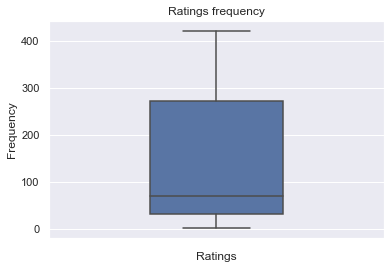

In [57]:
data = df_master.rating_numerator.value_counts()

ax = sns.boxplot(data, orient='v', width=.4)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

As we can see that their are 2 outliers here so let's investigate more and check their data

In [58]:
outliers_df = df_master[df_master.rating_numerator > 400][['rating_numerator', 'name', 'jpg_url', 'text']]
outliers_df

,rating_numerator,name,jpg_url,text
672,1776,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,This is Atticus. He's quite simply America af.
1552,420,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,Good dogg.


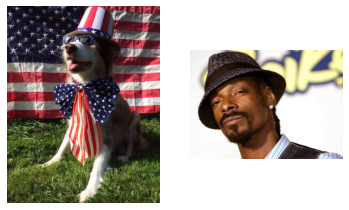

In [59]:
if not os.path.exists('images'):
    os.makedirs('images')
fig=plt.figure()
c = 1
for index, row in outliers_df.iterrows():
    r = requests.get(row['jpg_url'])
    i = Image.open(BytesIO(r.content))
    i.save('images/' +  str(index) + '_' + str(row['rating_numerator']) + "_" + str(row['name']) + '.jpg')
    fig.add_subplot(1, 2, c)
    c += 1
    plt.imshow(i)
    plt.axis("off")
plt.show()

### Define
- So we can see here that the picture with 1776 rating is simply very cute dog and has the best rating score but the other pic with 420 rating score is the rap star Snoop Dogg and should be removed from our data.

### Code

In [60]:
# Remove 'Snoop Dogg' from our master data
df_master.drop(index=1552, inplace=True)

### Test

In [61]:
df_master.query('rating_numerator == 420')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence,retweet_count,favorite_count


In [62]:
df_master.rating_numerator.unique()

array([  13,   12,   14,   11,    6,   10,    5,    7,    8,    9, 1776],
      dtype=int64)

- Next we can look for the relation betwee 'retweet_count' and 'favorite_count'

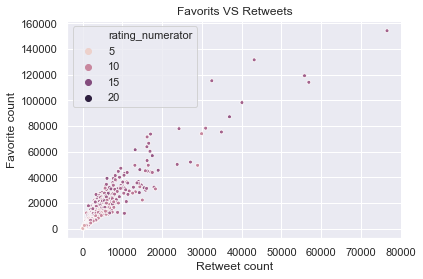

In [63]:
# Scatter plot to show the relation between favorits and retweets
ax = sns.scatterplot(x='retweet_count', y='favorite_count', data=df_master,
                     hue='rating_numerator', hue_norm=(5, 20), s=15) 
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorits VS Retweets')
plt.show()

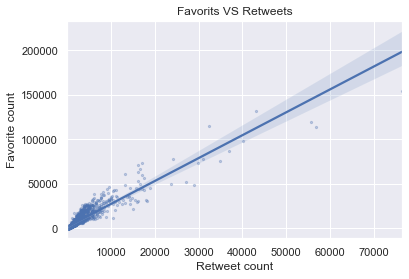

In [64]:
ax = sns.regplot(x='retweet_count', y='favorite_count', data=df_master, color='b', scatter_kws={'s':5, 'alpha':.3}) 
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorits VS Retweets')
plt.show()

As we expected the favorite and retweets are highly postive correlated.

- Now let's compare dog stages

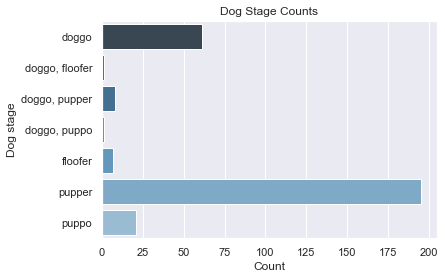

In [65]:
data = df_master.groupby('dog_stage').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Dog stage', title='Dog Stage Counts')
plt.show()

As we can see the most common stage is pupper 

- Comparing tweets different sources

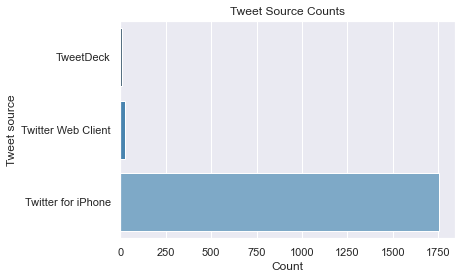

In [66]:
data = df_master.groupby('source').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Tweet source', title='Tweet Source Counts')
plt.show()

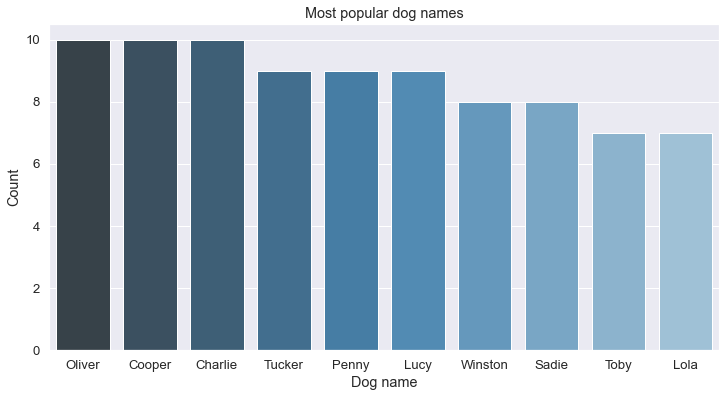

In [107]:
data = pd.read_sql("""SELECT name, COUNT(*) AS count
                        FROM master 
                    GROUP BY 1
                      HAVING name <> 'A'
                    ORDER BY 2 DESC
                    LIMIT 10;
                """, engine)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='name', y='count', data=data, palette='Blues_d', ax=ax)
ax.set(ylabel='Count', xlabel='Dog name', title='Most popular dog names')
plt.show()

And as we see here they tweeted the most from iPhone 

### Now let's create a funny world cloud from our tweets text

In [67]:
text = " ".join(tweet for tweet in df_master.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 142200 words in the combination of all review.


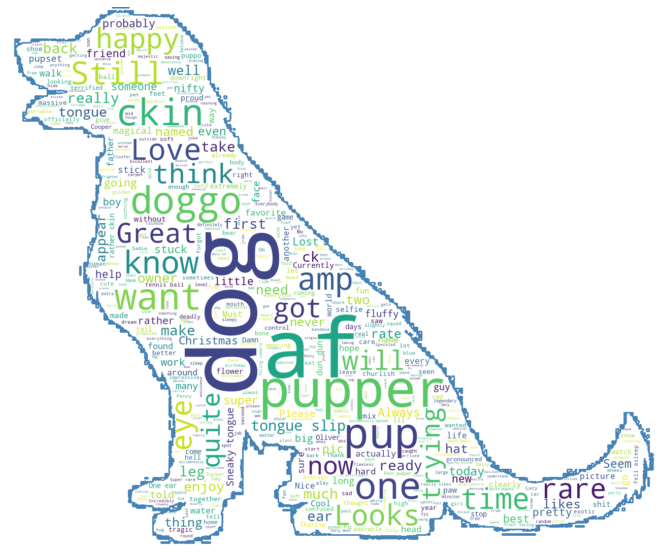

In [90]:
mask = np.array(Image.open('images/mask.jpeg'))
stopwords = set(STOPWORDS)
stopwords.update(['look', 'tho', 'see', 'good', 'hello', 'day', 'say', 'Meet'])
wordcloud = WordCloud( max_words=500, stopwords=stopwords, 
                      background_color='white', contour_width=3,
                      contour_color='steelblue', mask=mask).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('images/world_cloud.jpeg')
plt.show()

***

## Final words

It was really fun working in this broject as I already love dogs
<br>
and now you can meet the best dog 🐶 ever Looka  🥰
<br>
<img align='left' src='images/Looka.jpeg' width=200 height=200 />

***

# Sources

- Funny youtube [video](https://www.youtube.com/watch?v=ah6fmNEtXFI) to know the difference between ('doggo', 'floofer', 'pupper', 'puppo')
- Reading pandas data frame row by row [Stack over flow](https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas)
- For the word cloud funny image I followed this [tutorial](https://www.datacamp.com/community/tutorials/wordcloud-python) at [DataCamp](www.datacamp.com)